In [25]:
# Needed imports
from MarkinchiParser import MarkinchiParser as MIParser
from MarkinchiGenerator import MarkinchiGenerator as MIGenerator
import MarkinchiUtils as MIUtils
from rdkit import Chem
from rdkit.Chem import Draw
import os

In [26]:
# Generate a MarkInChI from a V3000 .mol file
filename = "molfiles\\test26.mol"
filedir = os.path.join(os.getcwd(), filename)

generator = MIGenerator()
generator.get_from_molfile(filedir)
markinchi = generator.generate_markinchi()
print(markinchi)

MarkInChI=1B/C6Zz6/c7-1-2(8)4(10)6(12)5(11)3(1)9<M>ClZz/c1-2!FZz/c1-2</M><M>ClZz/c1-2!FZz/c1-2</M><M>ClZz/c1-2!FZz/c1-2</M><M>ClZz/c1-2!FZz/c1-2</M><M>ClZz/c1-2!FZz/c1-2</M><M>ClZz/c1-2!FZz/c1-2</M>


In [27]:
# Generate a list of Mols from a MarkInChI
parser = MIParser(markinchi)
mol, rgroups = parser.parse_markinchi()
mol_list = MIUtils.enumerate_markush_mol(mol, rgroups)

[14:24:08] UFFTYPER: Unrecognized atom type: Xe3+4 (6)
[14:24:08] UFFTYPER: Unrecognized atom type: R2 (7)
[14:24:08] UFFTYPER: Unrecognized atom type: R3 (8)
[14:24:08] UFFTYPER: Unrecognized atom type: R4 (9)
[14:24:08] UFFTYPER: Unrecognized atom type: R5 (10)
[14:24:08] UFFTYPER: Unrecognized atom type: R6 (11)
[14:24:08] UFFTYPER: Unrecognized atom type: Xe3+4 (6)
[14:24:08] UFFTYPER: Unrecognized atom type: R2 (7)
[14:24:08] UFFTYPER: Unrecognized atom type: R3 (8)
[14:24:08] UFFTYPER: Unrecognized atom type: R4 (9)
[14:24:08] UFFTYPER: Unrecognized atom type: R5 (10)
[14:24:08] UFFTYPER: Unrecognized atom type: R6 (11)
[14:24:08] UFFTYPER: Unrecognized atom type: Xe3+4 (6)
[14:24:08] UFFTYPER: Unrecognized atom type: R3 (7)
[14:24:08] UFFTYPER: Unrecognized atom type: R4 (8)
[14:24:08] UFFTYPER: Unrecognized atom type: R5 (9)
[14:24:08] UFFTYPER: Unrecognized atom type: R6 (10)
[14:24:08] UFFTYPER: Unrecognized atom type: Xe3+4 (6)
[14:24:08] UFFTYPER: Unrecognized atom type: R3

In [28]:
# Compute the InChI for each Mol in the list of Mols
inchi_list = MIUtils.inchis_from_mol_list(mol_list)

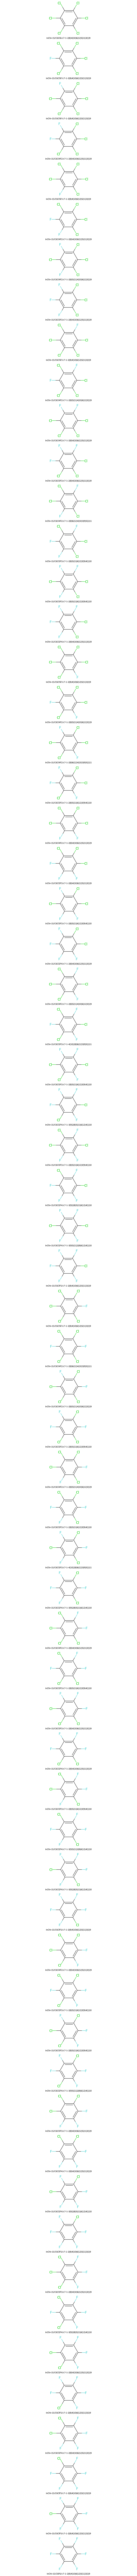

In [29]:
# Show each Mol in the list of Mols along with its InChI
# NB you may need to fiddle around with the parameters to get something legible, depending on how many Mols there are / how long the InChIs are
# If you get a 'File parsing error: PNG header not recognized', this seems to be due to the image being too big - try reducing the height of
# each image using subImgSize, or truncating the list by specifying maxMols

for mol in mol_list:
    Chem.rdDepictor.Compute2DCoords(mol)

Draw.MolsToGridImage(mol_list, molsPerRow=1, maxMols=len(mol_list), legends=inchi_list, subImgSize=(1024, 300))